# **Week 2: Colab Experiment**

In [467]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I. Introduction
In this exercise, we load the Youtube statistics and try to predict the number of subscribers.

# II. Methods
We train 2 models, linear regression and ridge regression. The hyperparameter in ridge regression is selected by grid search. The performance is evaluated with 5 fold cross validation.

In [468]:
# import the packges
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
# load the csv file
# change the path to your own
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML EE/Week2/Global_YouTube_Statistics_cleaned-1.csv")
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [470]:
# Use one-hot encoding to convert the categorical variables to numerical variables
# TODO
df.drop('Youtuber', axis = 1, inplace = True)
df_encoded = pd.get_dummies(df, columns = ['category', 'Abbreviation'])
# remove the redundant columns, category and Abbreviation, since we have included the one-hot encoded ones.

# get_dummies automatically remove the redundant columns


In [471]:
# Define the dependent and independent variables.
# TODO
Y = df_encoded['subscribers']
X = df_encoded.drop('subscribers', axis = 1)


In [472]:
# Create CV folds
# TODO
Y_np = Y.to_numpy()
X_np = X.to_numpy()

num_folds = 5
kf = KFold(n_splits = num_folds, shuffle= True, random_state= 42)
kf_split = kf.split(X_np)



In [473]:

# Train models and apply them to the test set
Y_est_linear = np.full([len(Y),1], np.nan)
Y_est_ridge = np.full([len(Y),1], np.nan)

linearModel = LinearRegression()
ridgeModel = Ridge()

scaler = StandardScaler()
fitScaler = scaler.fit(X_np)

parameter= {'alpha': list(np.arange(0, 1.5, 0.01))}
gridSearch = GridSearchCV(estimator = ridgeModel, param_grid = parameter, scoring = "neg_mean_squared_error", cv = num_folds)

# training steps
for trainIndex, testIndex in kf_split:
  # Xtrain. Ytrain for training,
  # XTest, YTest for predict
  # TODO
  X_train, X_test, Y_train, Y_test  = X_np[trainIndex], X_np[testIndex], Y_np[trainIndex], Y_np[testIndex]

  # Linear regression
  # TODO
  linearModel.fit(X_train, Y_train)

  Y_pred_linear = linearModel.predict(X_test)

  # Ridge regression
  # TODO

  gridSearch.fit(fitScaler.transform(X_train), Y_train)
  updatedRidgeModel = gridSearch.best_estimator_

  Y_pred_ridge = updatedRidgeModel.predict(fitScaler.transform(X_test))

  for i, updatedIndex in enumerate(testIndex):
    Y_est_linear[updatedIndex] = Y_pred_linear[i]
    Y_est_ridge[updatedIndex] = Y_pred_ridge[i]


df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [474]:
def plot_function(df, x_variable, y_variable):
  plt.figure(figsize = (5,5) , dpi=150)
  sns.scatterplot(data=df, x=x_variable, y=y_variable)
  corr = round(pearsonr(df[x_variable], df[y_variable])[0],3)
  rmse = round(mean_squared_error(df[x_variable], df[y_variable], squared=False),3)
  plt.title(f"corr = {corr} \n RMSE={rmse}")
  plt.show()

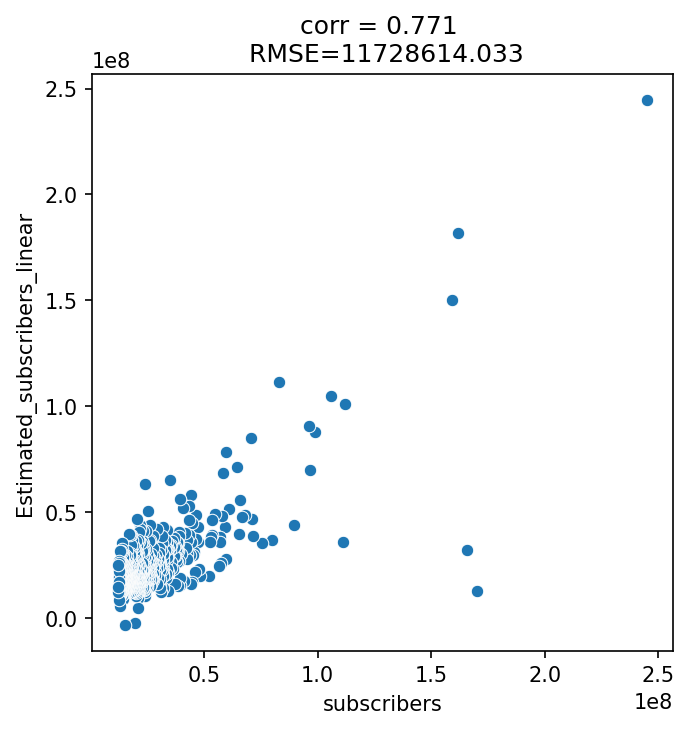

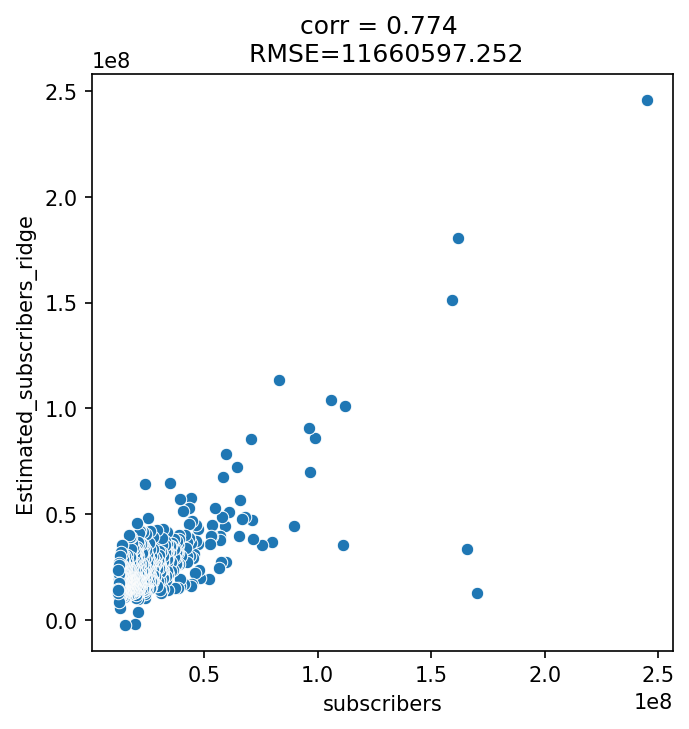

In [475]:
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion

We test 2 types of models, linear regression and ridge regression to predict the number of subscribers. We find that ridge regression, which is an extension of linear regression with regularization, performs better.